In [2]:
from src.common import *
from src.Brownian import *

## Brownian annihilation

A second approach to the simulation of two reactive species interacting is the Brownian walk on a lattice: the simulation space is discretized, and particles move by a fixed amount in a random direction at each time step. When two particles of opposite kind meet, they disappear, but nothing happens if they are of the same kind.

A simulation set is described with the class `Brownian`, whose constructor takes like before a number of particles, an initial concentration, and a number of steps for the simulation. Particles are then placed at random positions among an evenly distributed set of $2n +1$ positions on the $[-n, n]$ interval (where $n$ is the number of particles) and given random particle/anti-particle states. After that, the `compute()` method is called, which runs the simulation proper, comprised of the following steps:

1. Collision checking: the particles' positions are checked. If another particle of the opposite kind is found there, both are ended.

2. All remaining particles are randomly moved by a fixed amount (the lattice spacing) in one or the other direction, time advances one step and the loop repeats.

Once all the calculations are done, the trajectories are plotted as time-position lines, with blue representing particles and red representing anti-particles.

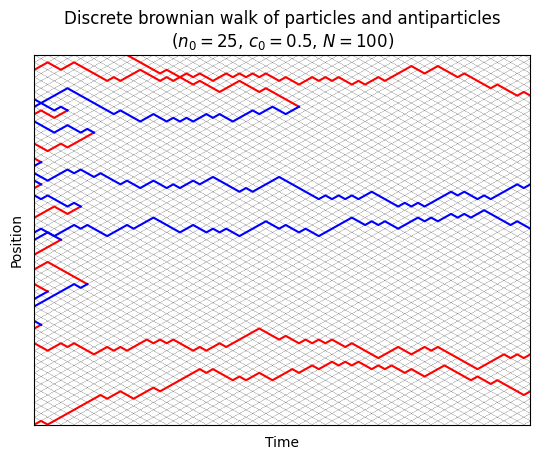

In [2]:
b = Brownian(25, 0.5)
b.plot()

We can then calculate the concentration of particles at each step of the simulation.

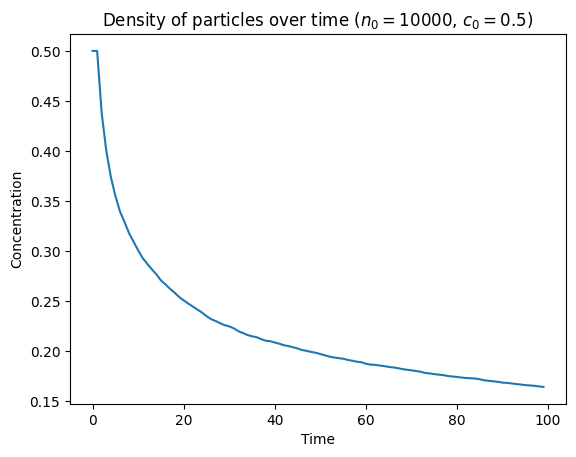

In [3]:
b = Brownian(10000, 0.5)
c = concentration(b, plot=True)

/mnt/c/Users/Victor/Desktop/Universite/Physique/Physique numérique/M1/Projet/src/common.py:110: RuntimeWarning: invalid value encountered in power
  c_model = lambda t, a, b, c, d: a + b/(t+c)**d


Concentration fit a+b/(t+c)^d, with:
a = 0.0990022344985114, b = 0.8610627035194747,
c = 3.6947924350409704, d = 0.5493051951642342
R^2 = 0.9960880986469535


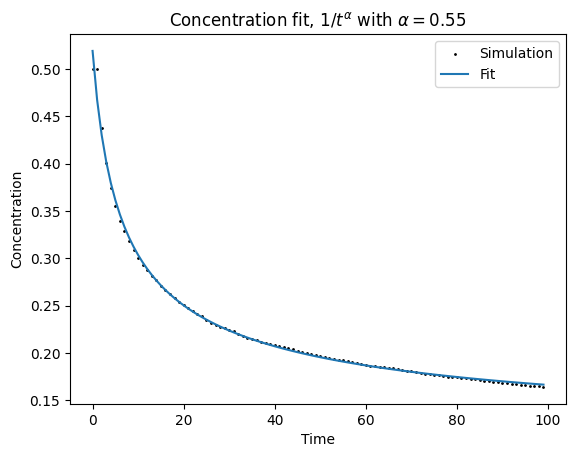

0.5493051951642342

In [4]:
fit(c)

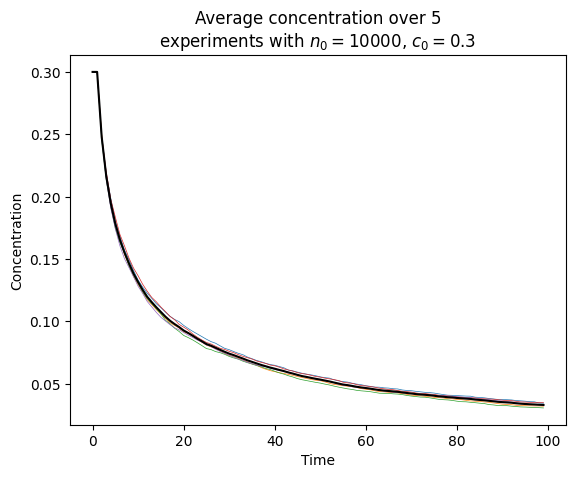

In [5]:
avg_c = avg_concentration(Brownian, (10000, 0.3), 5)

Concentration fit a+b/(t+c)^d, with:
a = 0.002649005478940495, b = 0.9255365026584288,
c = 4.389065046367245, d = 0.7310626046026092
R^2 = 0.9954780361816311


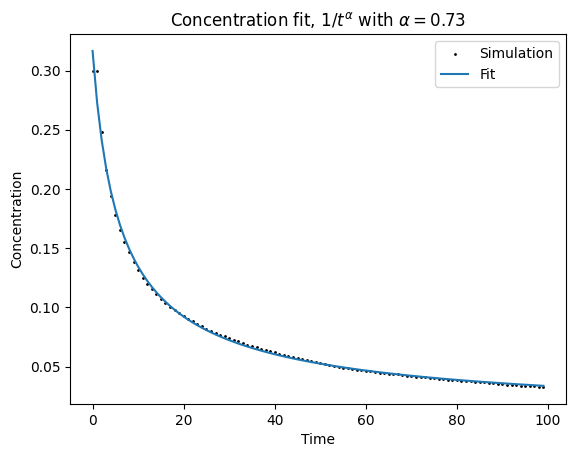

0.7310626046026092

In [6]:
fit(avg_c)

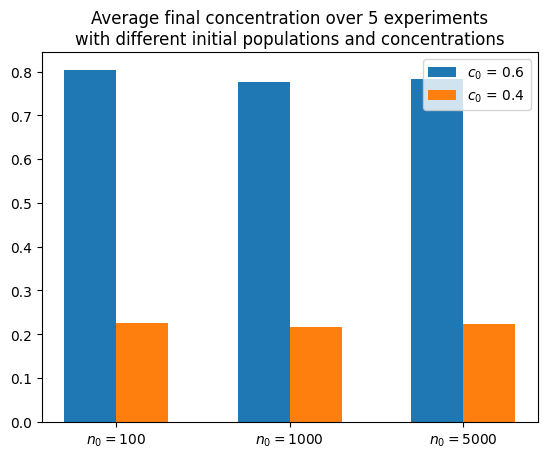

In [7]:
params = [(100, 1000, 5000), (0.6, 0.4)]
end_state(Brownian, params, 5)

[0.10510611534118652, 0.18321681022644043, 0.28150129318237305, 0.34041523933410645, 0.4284687042236328]
[0.10113024711608887, 0.15732955932617188, 0.231065034866333, 0.28949904441833496, 0.36916661262512207]


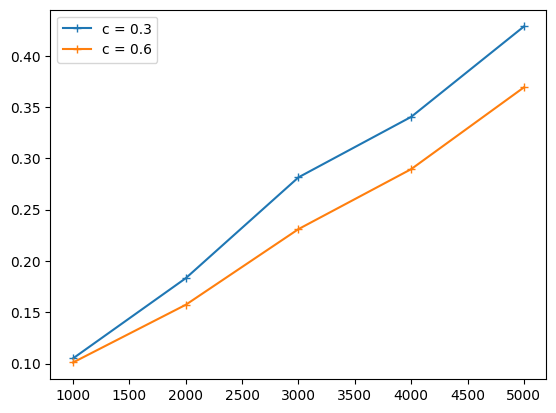

In [8]:
import time

ns = [1000, 2000, 3000, 4000, 5000]
elapsed_06 = []
elapsed_03 = []
for i in ns:
    start = time.time()
    Brownian(i, 0.6)
    end = time.time()
    elapsed_06.append(end - start)
    start = time.time()
    Brownian(i, 0.3)
    end = time.time()
    elapsed_03.append(end - start)

plt.plot(ns, elapsed_03, marker='+', label='c = 0.3')
plt.plot(ns, elapsed_06, marker='+', label='c = 0.6')
plt.legend()

print(elapsed_03)
print(elapsed_06)

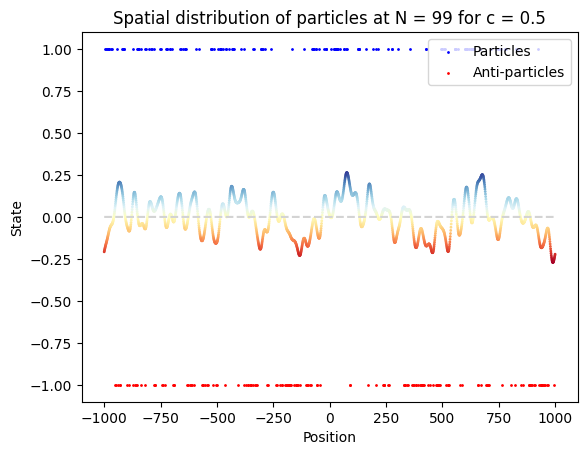

In [22]:
b = Brownian(1000, 0.5)
distribution(b)

/tmp/ipykernel_587/2744022843.py:48: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


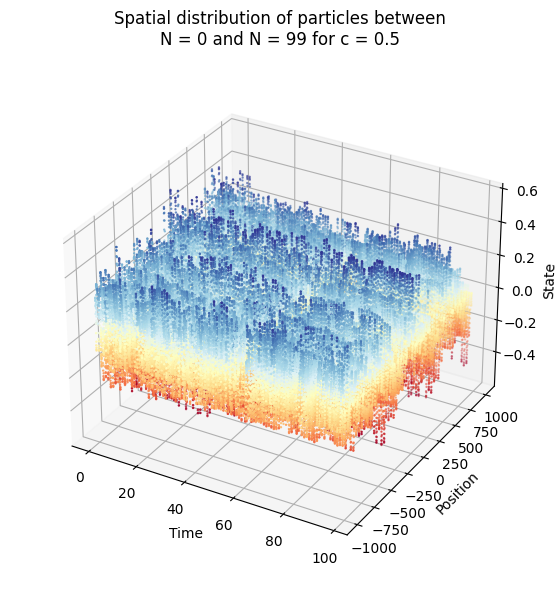

In [23]:
distribution(b, proj='3d')